# 4. Uso de los Mejores Modelos


Este notebook incluye un nuevo dataset con los datos de 10 candidatos ficticios que obtendrán una predicción del nivel de riesgo de un tratamiento tanto con psilocibina como con cannabis según las caracteristicas de su perfil.

Estos datos serán ingresados al mejor modelo obtenido para cada sustancia respectivamente para realizar predicciones con cada sujeto de prueba.


### Importaciones y Carga de Datos


In [1208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from joblib import load

In [1209]:
df_test = pd.read_csv('encuestas/encuesta_test.csv')
df_encoded_cannabis = pd.read_csv('encuestas/cannabis_encoded_modelos.csv')
df_encoded_psilocibina = pd.read_csv('encuestas/psilocibina_encoded_modelos.csv')

In [1210]:
df_test.head(3)

,Frecuencia Cannabis,Frecuencia Psilocibina,Propósito Cannabis,Propósito Psilocibina,Dependencia Cannabis,Dependencia Psilocibina,Abuso Cannabis,Abuso Psilocibina,Cantidad Tratamientos,Tipo de Dosis,Sesiones Macrodosis,Calificación Tratamiento,Historial Familiar,Condición,Efectos Positivos Cannabis,Efectos Negativos Cannabis,Efectos Positivos Psilocibina,Efectos Negativos Psilocibina
0,Cada mes,Varias veces al mes,Fines recreativos,Ambos,No,No,Si,No,Más de tres,Microdosis,NaN,4,Trastorno Depresivo Mayor o Persistente;Enferm...,Trastorno Depresivo Mayor o Persistente;Trasto...,Reducción de ansiedad,No tuvo ningún efecto negativo,Reducción de ansiedad;Reducción de sintomas de...,No tuvo ningún efecto negativo
1,Varias veces al año,Varias veces al año,Fines terapéuticos,Fines terapéuticos,No,No,No,No,Dos,Macrodosis,1-5 sesiones de un día,4,"Trastorno Bipolar (I , II);Epilepsia",Esquizofrenia;Psicosis;Adicción a las sustanci...,Aumento de creatividad;Aumento de apetito;Mejo...,Problemas de memoria o atención;Psicosis;Probl...,Aumento de introspección;Mayor sentido de prop...,Cambios de humor
2,Diario,Varias veces al mes,Ambos,Fines recreativos,Si,No,Si,No,NaN,Macrodosis,NaN,5,Trastorno Depresivo Mayor o Persistente;Trasto...,No sufro de ninguna condición relevante,Aumento de apetito;Mejora del sueño;Reducción ...,No tuvo ningún efecto negativo,Aumento de introspección;Mayor sentido de prop...,No tuvo ningún efecto negativo


In [1211]:
model_psilocibina = load('modelos/best_model_psilocibina.joblib')
model_cannabis = load('modelos/best_model_cannabis.joblib')

### Definición de Variables y Parámetros


In [1212]:
pd.set_option('display.max_columns', None)

In [1213]:
random_state_cannabis = 47
random_state_psilocibina = 33

### Preprocesamiento de los datos de prueba


##### Manejo de Nulos


In [1214]:
df_test.isna().sum()

Frecuencia Cannabis              0
Frecuencia Psilocibina           0
Propósito Cannabis               0
Propósito Psilocibina            0
Dependencia Cannabis             0
Dependencia Psilocibina          0
Abuso Cannabis                   0
Abuso Psilocibina                0
Cantidad Tratamientos            2
Tipo de Dosis                    0
Sesiones Macrodosis              5
Calificación Tratamiento         0
Historial Familiar               0
Condición                        0
Efectos Positivos Cannabis       0
Efectos Negativos Cannabis       0
Efectos Positivos Psilocibina    0
Efectos Negativos Psilocibina    0
dtype: int64

In [1215]:
df_test.fillna('Sin Dato', inplace=True)
df_test.replace({'N/A': 'Sin Dato'}, inplace=True)

##### Codificación One Hot


In [1216]:
# Definir variables categóricas que serán codificadas usando el metodo One Hot Encoder
columnas_cat = ['Historial Familiar',
                'Condición',
                'Efectos Positivos Cannabis', 
                'Efectos Negativos Cannabis', 
                'Efectos Positivos Psilocibina', 
                'Efectos Negativos Psilocibina' 
                ]

In [1217]:
# Separar las opciones de respuesta en cada una de las columnas categóricas y generar una lista con las respuestas
for col in columnas_cat:
    df_test[col] = df_test[col].str.split(';')

df_test.head(2)

,Frecuencia Cannabis,Frecuencia Psilocibina,Propósito Cannabis,Propósito Psilocibina,Dependencia Cannabis,Dependencia Psilocibina,Abuso Cannabis,Abuso Psilocibina,Cantidad Tratamientos,Tipo de Dosis,Sesiones Macrodosis,Calificación Tratamiento,Historial Familiar,Condición,Efectos Positivos Cannabis,Efectos Negativos Cannabis,Efectos Positivos Psilocibina,Efectos Negativos Psilocibina
0,Cada mes,Varias veces al mes,Fines recreativos,Ambos,No,No,Si,No,Más de tres,Microdosis,Sin Dato,4,"[Trastorno Depresivo Mayor o Persistente, Enfe...","[Trastorno Depresivo Mayor o Persistente, Tras...",[Reducción de ansiedad],[No tuvo ningún efecto negativo],"[Reducción de ansiedad, Reducción de sintomas ...",[No tuvo ningún efecto negativo]
1,Varias veces al año,Varias veces al año,Fines terapéuticos,Fines terapéuticos,No,No,No,No,Dos,Macrodosis,1-5 sesiones de un día,4,"[Trastorno Bipolar (I , II), Epilepsia]","[Esquizofrenia, Psicosis, Adicción a las susta...","[Aumento de creatividad, Aumento de apetito, M...","[Problemas de memoria o atención, Psicosis, Pr...","[Aumento de introspección, Mayor sentido de pr...",[Cambios de humor]


In [1218]:
# Crear columnas binarias usando 'explode' para descomponer las listas en filas
for col in columnas_cat:
    df_test = df_test.explode(col)

In [1219]:
# Aplica One-Hot Encoding a las columnas categóricas del DF con los datos explotados
df_test_encoded = pd.get_dummies(df_test, columns=columnas_cat, prefix=columnas_cat)

In [1220]:
# Agrupar por el índice original para reconstruir el DataFrame en la forma deseada
df_test_encoded = df_test_encoded.groupby(df_test_encoded.index).max().reset_index(drop=True)
df_test_encoded.head(2)

,Frecuencia Cannabis,Frecuencia Psilocibina,Propósito Cannabis,Propósito Psilocibina,Dependencia Cannabis,Dependencia Psilocibina,Abuso Cannabis,Abuso Psilocibina,Cantidad Tratamientos,Tipo de Dosis,Sesiones Macrodosis,Calificación Tratamiento,Historial Familiar_Adicción a juegos o apuestas,Historial Familiar_Adicción a la nicotina,Historial Familiar_Adicción a las sustancias sintéticas o drogas ilegales,Historial Familiar_Adicción al alcohol,Historial Familiar_Enfermedad de Alzheimer,Historial Familiar_Epilepsia,Historial Familiar_No hay condiciones relevantes en mi familia,Historial Familiar_Otros,"Historial Familiar_Trastorno Bipolar (I , II)",Historial Familiar_Trastorno Depresivo Mayor o Persistente,Historial Familiar_Trastorno de Ansiedad Generalizada (TAG),Condición_Adicción a la nicotina,Condición_Adicción a las sustancias sintéticas o drogas ilegales,Condición_Adicción al alcohol,Condición_Esquizofrenia,Condición_No sufro de ninguna condición relevante,Condición_Paranoia,Condición_Psicosis,"Condición_Trastorno Bipolar (I , II)",Condición_Trastorno Depresivo Mayor o Persistente,Condición_Trastorno de Ansiedad Generalizada (TAG),Condición_Trastorno esquizoafectivo,Efectos Positivos Cannabis_Alivio de dolores crónicos,Efectos Positivos Cannabis_Aumento de apetito,Efectos Positivos Cannabis_Aumento de creatividad,Efectos Positivos Cannabis_Mejora del sueño,Efectos Positivos Cannabis_Mejora en el estado de animo,Efectos Positivos Cannabis_Mejora en la introspección / conexión con el ser,Efectos Positivos Cannabis_No tuvo ningún efecto positivo,Efectos Positivos Cannabis_Otros,Efectos Positivos Cannabis_Reducción de ansiedad,Efectos Positivos Cannabis_Reducción de inflamación o espasmos,Efectos Negativos Cannabis_Aislamiento,Efectos Negativos Cannabis_Falta de apetito,Efectos Negativos Cannabis_No tuvo ningún efecto negativo,Efectos Negativos Cannabis_Otros,Efectos Negativos Cannabis_Problemas de memoria o atención,Efectos Negativos Cannabis_Problemas respiratorios,Efectos Negativos Cannabis_Psicosis,Efectos Negativos Cannabis_Trastornos del sueño,Efectos Positivos Psilocibina_Aumento de apetito,Efectos Positivos Psilocibina_Aumento de introspección,Efectos Positivos Psilocibina_Mayor sentido de propósito o satisfacción con la vida,Efectos Positivos Psilocibina_Mejora del sueño,Efectos Positivos Psilocibina_No tuvo ningún efecto positivo,Efectos Positivos Psilocibina_Reducción de ansiedad,Efectos Positivos Psilocibina_Reducción de sintomas de depresión,Efectos Negativos Psilocibina_Cambios de humor,Efectos Negativos Psilocibina_No tuvo ningún efecto negativo,Efectos Negativos Psilocibina_Otros,Efectos Negativos Psilocibina_Problemas de memoria o atención,Efectos Negativos Psilocibina_Psicosis
0,Cada mes,Varias veces al mes,Fines recreativos,Ambos,No,No,Si,No,Más de tres,Microdosis,Sin Dato,4,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,True,False,True,True,False,True,False,False,False
1,Varias veces al año,Varias veces al año,Fines terapéuticos,Fines terapéuticos,No,No,No,No,Dos,Macrodosis,1-5 sesiones de un día,4,False,False,False,False,False,True,False,False,True,False,False,False,True,True,True,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False


##### Transformaciones Adicionales


In [1221]:
# Combinación de las respuestas para 'psicosis' y 'paranoia' para un mejor manejo
cols_existentes = [col for col in ['Condición_Psicosis', 'Condición_Paranoia', 'Historial Familiar_Psicosis', 'Historial Familiar_Paranoia'] if col in df_test_encoded.columns]

if cols_existentes:
    # Crear la nueva columna combinada basada en las columnas existentes
    df_test_encoded['Condición_Psicosis/Paranoia'] = df_test_encoded[cols_existentes].any(axis=1)
    # Eliminar las columnas antiguas
    df_test_encoded.drop(cols_existentes, axis=1, inplace=True)


In [1222]:
# Renombrar columnas en texto a valores binarios
binarias_dict = {
    'Sin Dato': 0,
    'No': 0,
    'Si': 1
}

cols_dependencia_abuso = ['Dependencia Cannabis', 'Abuso Cannabis', 'Dependencia Psilocibina', 'Abuso Psilocibina']

for col in cols_dependencia_abuso:
    df_test_encoded[col] = df_test_encoded[col].map(binarias_dict)


In [1223]:
# Convertir las columnas binarias (1,0) en booleanas (True, False)
cols_binarias = ['Dependencia Cannabis', 'Abuso Cannabis', 'Dependencia Psilocibina', 'Abuso Psilocibina']

for col in cols_binarias:
    df_test_encoded[col] = df_test_encoded[col].astype(bool)

In [1224]:
# Renombrar las columnas para tener mas claridad y facil acceso
dict_renombrar_respuestas = {
    'Historial Familiar_Adicción a juegos o apuestas': 'Historial Familiar_Adicción Juegos o Apuestas',
    'Historial Familiar_Adicción a la nicotina': 'Historial Familiar_Adicción Nicotina',
    'Historial Familiar_Adicción a las sustancias sintéticas o drogas ilegales': 'Historial Familiar_Adicción Sustancias Sintenticas o Drogas Ilegales',
    'Historial Familiar_Adicción a medicamentos recetados': 'Historial Familiar_Adicción Medicamentos Recetados',
    'Historial Familiar_Adicción al alcohol': 'Historial Familiar_Adicción Alcohol',
    'Historial Familiar_Trastorno Bipolar (I, II)': 'Historial Familiar_Trastorno Bipolar',
    'Historial Familiar_Trastorno Bipolar (I , II)': 'Historial Familiar_Trastorno Bipolar',
    'Historial Familiar_Trastorno de Ansiedad Generalizada (TAG)': 'Historial Familiar_Trastorno de Ansiedad Generalizada',
    'Historial Familiar_No hay condiciones relevantes en mi familia': 'Historial Familiar_Sin Condición Relevante',
    'Condición_Adicción a juegos o apuestas': 'Condición_Adicción Juegos o Apuestas',
    'Condición_Adicción a la nicotina': 'Condición_Adicción Nicotina',
    'Condición_Adicción a las sustancias sintéticas o drogas ilegales': 'Condición_Adicción Sustancias Sintenticas o Drogas Ilegales',
    'Condición_Adicción a medicamentos recetados': 'Condición_Adicción Medicamentos Recetados',
    'Condición_Adicción al alcohol': 'Condición_Adicción Alcohol',
    'Condición_Trastorno de Ansiedad Generalizada (TAG)': 'Condición_Trastorno de Ansiedad Generalizada',
    'Condición_Trastorno Bipolar (I, II)': 'Condición_Trastorno Bipolar',
    'Condición_Trastorno Bipolar (I , II)': 'Condición_Trastorno Bipolar',
    'Condición_No sufro de ninguna condición relevante': 'Condición_Sin Condición Relevante',
    'Efectos Positivos Cannabis_Alivio de dolores crónicos': 'Efectos Positivos Cannabis_Alivio Dolores Crónicos',
    'Efectos Positivos Cannabis_Aumento de apetito': 'Efectos Positivos Cannabis_Aumento Apetito',
    'Efectos Positivos Cannabis_Aumento de creatividad': 'Efectos Positivos Cannabis_Aumento Creatividad',
    'Efectos Positivos Cannabis_Mejora del sueño': 'Efectos Positivos Cannabis_Mejora Sueño',
    'Efectos Positivos Cannabis_Mejora en el estado de animo': 'Efectos Positivos Cannabis_Mejora Estado de Animo',
    'Efectos Positivos Cannabis_Mejora en la introspección / conexión con el ser': 'Efectos Positivos Cannabis_Mejora Introspección',
    'Efectos Positivos Cannabis_No tuvo ningún efecto positivo': 'Efectos Positivos Cannabis_Sin Efecto Positivo',
    'Efectos Positivos Cannabis_Reducción de ansiedad': 'Efectos Positivos Cannabis_Reducción Ansiedad',
    'Efectos Positivos Cannabis_Reducción de inflamación o espasmos': 'Efectos Positivos Cannabis_Reducción Inflamacion o Espasmos',
    'Efectos Negativos Cannabis_Falta de apetito': 'Efectos Negativos Cannabis_Falta Apetito',
    'Efectos Negativos Cannabis_No tuvo ningún efecto negativo': 'Efectos Negativos Cannabis_Sin Efecto Negativo',
    'Efectos Negativos Cannabis_Problemas de memoria o atención': 'Efectos Negativos Cannabis_Problemas Memoria o Atención',
    'Efectos Positivos Psilocibina_Alivio de dolores crónicos': 'Efectos Positivos Psilocibina_Alivio Dolores Crónicos',
    'Efectos Positivos Psilocibina_Aumento de apetito': 'Efectos Positivos Psilocibina_Aumento Apetito',
    'Efectos Positivos Psilocibina_Aumento de introspección': 'Efectos Positivos Psilocibina_Mejora Introspección',
    'Efectos Positivos Psilocibina_Mayor sentido de propósito o satisfacción con la vida': 'Efectos Positivos Psilocibina_Mayor Satisfacción con la Vida',
    'Efectos Positivos Psilocibina_Mejora del sueño': 'Efectos Positivos Psilocibina_Mejora Sueño',
    'Efectos Positivos Psilocibina_No tuvo ningún efecto positivo': 'Efectos Positivos Psilocibina_Sin Efecto Positivo',
    'Efectos Positivos Psilocibina_Reducción de ansiedad': 'Efectos Positivos Psilocibina_Reducción Ansiedad',
    'Efectos Positivos Psilocibina_Reducción de sintomas de depresión': 'Efectos Positivos Psilocibina_Reducción Sintomas Depresión',
    'Efectos Negativos Psilocibina_No tuvo ningún efecto negativo': 'Efectos Negativos Psilocibina_Sin Efecto Negativo',
    'Efectos Negativos Psilocibina_Problemas de memoria o atención': 'Efectos Negativos Psilocibina_Problemas Memoria o Atención'
}

df_test_encoded.rename(columns=dict_renombrar_respuestas, inplace=True)

Reemplazar caracteres especiales en los nombres de las columnas


In [1225]:
df_test_encoded.columns = df_test_encoded.columns.str.replace(r'[^\w\s/,\']', '_', regex=True)

In [1226]:
df_test = df_test_encoded.copy()

##### Label Encoding


Codificación manual para asegurar que los valores codificados sean iguales.


In [1227]:
columnas_label_encoder = ['Frecuencia Cannabis', 'Frecuencia Psilocibina']

dict_encoder_frecuencia = {
    "Sin Dato": 0,
    "Diario": 1,
    "Varias veces a la semana": 2,
    "Cada semana": 3,
    "Varias veces al mes": 4,
    "Cada mes": 5,
    "Varias veces al año": 6,
    "Cada año": 7
}

dict_encoder_sesiones_macro = {
    "Sin Dato": 0,
    "Una sesión de un día": 1,
    "1-5 sesiones de un día": 2,
    "Más de 10 sesiones de un día": 3,
    "Otros": 4
}

dict_encoder_cantidad_tratamientos = {
    "Sin Dato": 0,
    "Uno": 1,
    "Dos": 2,
    "Más de tres": 3
}


In [1228]:
# Codificación Frecuencia de Consumo
for col in columnas_label_encoder:
    df_test_encoded[col] = df_test_encoded[col].map(dict_encoder_frecuencia)
    df_test_encoded[col] = df_test_encoded[col].astype(int)

# Codificación Cantidad de Sesiones con Macrodosis
df_test_encoded['Sesiones Macrodosis'] = df_test_encoded['Sesiones Macrodosis'].map(dict_encoder_sesiones_macro)
df_test_encoded['Sesiones Macrodosis'] = df_test_encoded['Sesiones Macrodosis'].astype(int)

# Codificación Cantidad de Tratamientos con SPA
df_test_encoded['Cantidad Tratamientos'] = df_test_encoded['Cantidad Tratamientos'].map(dict_encoder_cantidad_tratamientos)
df_test_encoded['Cantidad Tratamientos'] = df_test_encoded['Cantidad Tratamientos'].astype(int)

##### One Hot Encoding para el resto de variables


In [1229]:
df_test_encoded = pd.get_dummies(df_test_encoded)  

In [1230]:
df_test_encoded.head(3)

,Frecuencia Cannabis,Frecuencia Psilocibina,Dependencia Cannabis,Dependencia Psilocibina,Abuso Cannabis,Abuso Psilocibina,Cantidad Tratamientos,Sesiones Macrodosis,Calificación Tratamiento,Historial Familiar_Adicción Juegos o Apuestas,Historial Familiar_Adicción Nicotina,Historial Familiar_Adicción Sustancias Sintenticas o Drogas Ilegales,Historial Familiar_Adicción Alcohol,Historial Familiar_Enfermedad de Alzheimer,Historial Familiar_Epilepsia,Historial Familiar_Sin Condición Relevante,Historial Familiar_Otros,Historial Familiar_Trastorno Bipolar,Historial Familiar_Trastorno Depresivo Mayor o Persistente,Historial Familiar_Trastorno de Ansiedad Generalizada,Condición_Adicción Nicotina,Condición_Adicción Sustancias Sintenticas o Drogas Ilegales,Condición_Adicción Alcohol,Condición_Esquizofrenia,Condición_Sin Condición Relevante,Condición_Trastorno Bipolar,Condición_Trastorno Depresivo Mayor o Persistente,Condición_Trastorno de Ansiedad Generalizada,Condición_Trastorno esquizoafectivo,Efectos Positivos Cannabis_Alivio Dolores Crónicos,Efectos Positivos Cannabis_Aumento Apetito,Efectos Positivos Cannabis_Aumento Creatividad,Efectos Positivos Cannabis_Mejora Sueño,Efectos Positivos Cannabis_Mejora Estado de Animo,Efectos Positivos Cannabis_Mejora Introspección,Efectos Positivos Cannabis_Sin Efecto Positivo,Efectos Positivos Cannabis_Otros,Efectos Positivos Cannabis_Reducción Ansiedad,Efectos Positivos Cannabis_Reducción Inflamacion o Espasmos,Efectos Negativos Cannabis_Aislamiento,Efectos Negativos Cannabis_Falta Apetito,Efectos Negativos Cannabis_Sin Efecto Negativo,Efectos Negativos Cannabis_Otros,Efectos Negativos Cannabis_Problemas Memoria o Atención,Efectos Negativos Cannabis_Problemas respiratorios,Efectos Negativos Cannabis_Psicosis,Efectos Negativos Cannabis_Trastornos del sueño,Efectos Positivos Psilocibina_Aumento Apetito,Efectos Positivos Psilocibina_Mejora Introspección,Efectos Positivos Psilocibina_Mayor Satisfacción con la Vida,Efectos Positivos Psilocibina_Mejora Sueño,Efectos Positivos Psilocibina_Sin Efecto Positivo,Efectos Positivos Psilocibina_Reducción Ansiedad,Efectos Positivos Psilocibina_Reducción Sintomas Depresión,Efectos Negativos Psilocibina_Cambios de humor,Efectos Negativos Psilocibina_Sin Efecto Negativo,Efectos Negativos Psilocibina_Otros,Efectos Negativos Psilocibina_Problemas Memoria o Atención,Efectos Negativos Psilocibina_Psicosis,Condición_Psicosis/Paranoia,Propósito Cannabis_Ambos,Propósito Cannabis_Fines recreativos,Propósito Cannabis_Fines terapéuticos,Propósito Psilocibina_Ambos,Propósito Psilocibina_Fines recreativos,Propósito Psilocibina_Fines terapéuticos,Tipo de Dosis_Macrodosis,Tipo de Dosis_Microdosis
0,5,4,False,False,True,False,3,0,4,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,True,False,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,True
1,6,6,False,False,False,False,2,2,4,False,False,False,False,False,True,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False
2,1,4,True,False,True,False,0,0,5,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False


### División de los DataFrames


In [1234]:
df_test_encoded_cannabis = df_test_encoded.copy()
df_test_encoded_psilocibina = df_test_encoded.copy()

In [1235]:
for col in df_test_encoded_cannabis.columns:
    if 'Psilocibina' in col or 'Otros' in col or 'Sin Dato' in col or 'Tipo de Dosis' in col or 'Macrodosis' in col or 'Cantidad Tratamientos' in col or 'Microdosis' in col or 'Sin Razón' in col:
        df_test_encoded_cannabis.drop(columns=[col], inplace=True)


for col in df_test_encoded_psilocibina.columns:
    if 'Cannabis' in col or 'Otros' in col or 'Sin Dato' in col or 'Sin Razón' in col:
        df_test_encoded_psilocibina.drop(columns=[col], inplace=True)


In [1236]:
df_test_encoded_psilocibina.head(3)

,Frecuencia Psilocibina,Dependencia Psilocibina,Abuso Psilocibina,Cantidad Tratamientos,Sesiones Macrodosis,Calificación Tratamiento,Historial Familiar_Adicción Juegos o Apuestas,Historial Familiar_Adicción Nicotina,Historial Familiar_Adicción Sustancias Sintenticas o Drogas Ilegales,Historial Familiar_Adicción Alcohol,Historial Familiar_Enfermedad de Alzheimer,Historial Familiar_Epilepsia,Historial Familiar_Sin Condición Relevante,Historial Familiar_Trastorno Bipolar,Historial Familiar_Trastorno Depresivo Mayor o Persistente,Historial Familiar_Trastorno de Ansiedad Generalizada,Condición_Adicción Nicotina,Condición_Adicción Sustancias Sintenticas o Drogas Ilegales,Condición_Adicción Alcohol,Condición_Esquizofrenia,Condición_Sin Condición Relevante,Condición_Trastorno Bipolar,Condición_Trastorno Depresivo Mayor o Persistente,Condición_Trastorno de Ansiedad Generalizada,Condición_Trastorno esquizoafectivo,Efectos Positivos Psilocibina_Aumento Apetito,Efectos Positivos Psilocibina_Mejora Introspección,Efectos Positivos Psilocibina_Mayor Satisfacción con la Vida,Efectos Positivos Psilocibina_Mejora Sueño,Efectos Positivos Psilocibina_Sin Efecto Positivo,Efectos Positivos Psilocibina_Reducción Ansiedad,Efectos Positivos Psilocibina_Reducción Sintomas Depresión,Efectos Negativos Psilocibina_Cambios de humor,Efectos Negativos Psilocibina_Sin Efecto Negativo,Efectos Negativos Psilocibina_Problemas Memoria o Atención,Efectos Negativos Psilocibina_Psicosis,Condición_Psicosis/Paranoia,Propósito Psilocibina_Ambos,Propósito Psilocibina_Fines recreativos,Propósito Psilocibina_Fines terapéuticos,Tipo de Dosis_Macrodosis,Tipo de Dosis_Microdosis
0,4,False,False,3,0,4,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True,True,False,True,False,False,False,True,False,False,False,True
1,6,False,False,2,2,4,False,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,False,True,False,False,True,True,False
2,4,False,False,0,0,5,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False


### Sistema Experto


Definición de Variables y Funciones


In [1237]:
# Variables relevantes para la determinación del nivel de riesgo
historial_familiar_condiciones_riesgosas = ['Historial Familiar_Esquizofrenia', 'Historial Familiar_Psicosis/Paranoia', 'Historial Familiar_Trastorno Bipolar']
condiciones_medicas_riesgosas = ['Condición_Esquizofrenia', 'Condición_Trastorno Bipolar', 'Condición_Psicosis/Paranoia']

historial_familiar_adicciones = ['Historial Familiar_Adicción Juegos o Apuestas','Historial Familiar_Adicción Nicotina','Historial Familiar_Adicción Sustancias Sintéticas o Drogas Ilegales','Historial Familiar_Adicción Medicamentos Recetados','Historial Familiar_Adicción Alcohol']
condiciones_medicas_adicciones = ['Condición_Adicción Juegos o Apuestas','Condición_Adicción Nicotina','Condición_Adicción Sustancias Sintéticas o Drogas Ilegales','Condición_Adicción Medicamentos Recetados','Condición_Adicción Alcohol']

efectos_positivos_cannabis = ['Efectos Positivos Cannabis_Aumento Apetito', 'Efectos Positivos Cannabis_Aumento Creatividad', 'Efectos Positivos Cannabis_Mejora Sueño', 'Efectos Positivos Cannabis_Mejora Estado de Animo', 'Efectos Positivos Cannabis_Mejora Introspección', 'Efectos Positivos Cannabis_Reducción Ansiedad', 'Efectos Negativos Cannabis_Sin Efecto Negativo']
efectos_moderados_cannabis = ['Efectos Negativos Cannabis_Aislamiento', 'Efectos Negativos Cannabis_Falta Apetito', 'Efectos Negativos Cannabis_Problemas Memoria o Atención', 'Efectos Negativos Cannabis_Trastornos del sueño', 'Efectos Negativos Cannabis_Problemas respiratorios', 'Efectos Negativos Cannabis_Problemas cognitivos']
efectos_negativos_determinantes_cannabis = ['Efectos Negativos Cannabis_Psicosis']

efectos_positivos_psilocibina = ['Efectos Positivos Psilocibina_Alivio Dolores Crónicos','Efectos Positivos Psilocibina_Aumento Apetito','Efectos Positivos Psilocibina_Mejora Introspección','Efectos Positivos Psilocibina_Mayor Satisfacción con la Vida','Efectos Positivos Psilocibina_Mejora Sueño','Efectos Positivos Psilocibina_Reducción Ansiedad','Efectos Positivos Psilocibina_Reducción Sintomas Depresión','Efectos Negativos Psilocibina_Sin Efecto Negativo']
efectos_moderados_psilocibina = ['Efectos Negativos Psilocibina_Cambios de humor','Efectos Negativos Psilocibina_Problemas Memoria o Atención']
efectos_negativos_determinantes_psilocibina = ['Efectos Negativos Psilocibina_Psicosis']


In [1238]:
# Verifica si las columnas existen en el DataFrame. Si no, devuelve un DataFrame con valores predeterminados.
def get_columns(df, cols, default_value=False):
    existing_cols = [col for col in cols if col in df.columns]
    if not existing_cols:
        return pd.DataFrame({default_value: [default_value] * len(df)})
    return df[existing_cols]

##### Cannabis


In [1239]:
riesgo_bajo_cannabis = (
    (        
        # El consumo de cannabis no es frecuente.
            (
                (~df_test['Frecuencia Cannabis'].isin(['Diario', 'Varias veces por semana', 'Cada semana'])) &
                (
                    (
                        # No reporta dependencia a la sustancia ni consumo abusivo
                        (
                            (df_test['Dependencia Cannabis'] == False) &
                            (df_test['Abuso Cannabis'] == False)
                        ) &
                        # No presenta adicciones ni condiciones médicas riesgosas
                        (
                            get_columns(df_test, condiciones_medicas_adicciones).eq(False).all(axis=1) &
                            get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1)
                        )
                    ) &
                    # Ha experimentado efectos positivos con la sustancia y ningún efecto negativo determinante, como psicosis
                    get_columns(df_test, efectos_positivos_cannabis).eq(True).any(axis=1) &
                    get_columns(df_test, efectos_negativos_determinantes_cannabis).eq(False).all(axis=1) 
                    
                )
            ) |
            # El consumo de cannabis es frecuente pero ni el participante ni su familia cumplen con ninguna condición riesgosa ni moderada
            (
                (df_test['Frecuencia Cannabis'].isin(['Diario', 'Varias veces por semana', 'Cada semana'])) &
                (
                    # No reporta dependencia a la sustancia ni consumo abusivo
                    (
                        (df_test['Dependencia Cannabis'] == False) &
                        (df_test['Abuso Cannabis'] == False)
                    ) &
                    # No presenta adicciones ni condiciones médicas riesgosas
                    (
                        get_columns(df_test, condiciones_medicas_adicciones).eq(False).all(axis=1) &
                        get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1)
                    ) &
                    # Su familia no presenta adicciones ni condiciones médicas riesgosas
                    (
                        get_columns(df_test, historial_familiar_adicciones).eq(False).all(axis=1) &
                        get_columns(df_test, historial_familiar_condiciones_riesgosas).eq(False).all(axis=1)
                    )
                )
            )
        ) &
        # No presenta condiciones de riesgo
        (
            get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1) &
            (df_test['Dependencia Cannabis'] == False) 
        )
    )

In [1240]:
riesgo_medio_cannabis = (
    (            
        # El consumo no es muy frecuente
        (~df_test['Frecuencia Cannabis'].isin(['Diario', 'Varias veces por semana'])) &

            (     
                (
                        # No reporta dependencia a la sustancia ni consumo abusivo
                        (
                            (df_test['Dependencia Cannabis'] == False) |
                            (df_test['Abuso Cannabis'] == False)
                        ) &

                        # No presenta adicciones, ni condiciones medicas riesgosas 
                        (
                            get_columns(df_test, condiciones_medicas_adicciones).eq(False).all(axis=1) &
                            get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1) 
                        ) |

                        # Alguien de su familia presenta una adicción o alguna condición riesgosa pero el participante no
                        (
                            (
                                get_columns(df_test, historial_familiar_condiciones_riesgosas).eq(True).any(axis=1) |
                                get_columns(df_test, historial_familiar_adicciones).eq(True).any(axis=1) 
                            ) &
                            (
                                get_columns(df_test, condiciones_medicas_adicciones).eq(False).all(axis=1) &
                                get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1) 
                            ) 
                        )
                    ) &

                    # Experimenta efectos positivos con la sustancia y ningún efecto negativo determinante, como psicosis
                    get_columns(df_test, efectos_positivos_cannabis).eq(True).any(axis=1) &
                    get_columns(df_test, efectos_negativos_determinantes_cannabis).eq(False).all(axis=1) 
                    
                ) |

            # El consumo es frecuente pero no presenta condiciones riesgosas
            (df_test['Frecuencia Cannabis'].isin(['Diario', 'Varias veces por semana', 'Cada semana'])) &

            (
                # No reporta dependencia a la sustancia ni consumo abusivo
                (
                    (df_test['Dependencia Cannabis'] == False) &
                    (df_test['Abuso Cannabis'] == False)
                ) &

                # No presenta adicciones, ni condiciones medicas riesgosas 
                (
                    get_columns(df_test, condiciones_medicas_adicciones).eq(False).all(axis=1) &
                    get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1) 
                ) |

                # Alguien de su familia presenta una adicción o alguna condición riesgosa pero el participante no
                (
                    (
                        get_columns(df_test, historial_familiar_condiciones_riesgosas).eq(True).any(axis=1) |
                        get_columns(df_test, historial_familiar_adicciones).eq(True).any(axis=1) 
                    ) &
                    (
                        get_columns(df_test, condiciones_medicas_adicciones).eq(False).all(axis=1) &
                        get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1) 
                    ) 
                ) |

                # Reporta consumo abusivo o dependencia a la sustancia pero nunca ha experimentado efectos negativos determinantes ni tiene condiciones riesgosas
                (
                    (
                        (df_test['Dependencia Cannabis'] == True) |
                        (df_test['Abuso Cannabis'] == True)
                    ) & 
                    
                    get_columns(df_test, efectos_negativos_determinantes_cannabis).eq(False).all(axis=1) &
                    get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1) 
                )

            )     
        ) &
        
        # No presenta condiciones de riesgo
        (
            get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1) &
            (df_test['Dependencia Cannabis'] == False) 
        )
    
    )

In [1241]:
riesgo_alto_cannabis = (
        # El consumo es frecuente y reporta condiciones riesgosas
        (    
            (df_test['Frecuencia Cannabis'].isin(['Diario', 'Varias veces a la semana', 'Cada semana'])) &

                (
                    # Reporta dependencia 
                    (
                        (df_test['Dependencia Cannabis'] == True) |

                        # Presenta efectos negativos moderados y adicciones o condiciones medicas riesgosas
                        (
                            get_columns(df_test, efectos_moderados_cannabis).eq(True).any(axis=1) &
                            get_columns(df_test, condiciones_medicas_adicciones).eq(True).any(axis=1) |
                            get_columns(df_test, condiciones_medicas_riesgosas).eq(True).any(axis=1) 
                        ) |

                        # Ha experimentado efectos negativos determinantes como psicosis y presenta condiciones riesgosas
                        (
                            get_columns(df_test, efectos_negativos_determinantes_cannabis).eq(True).any(axis=1) &
                            get_columns(df_test, condiciones_medicas_riesgosas).eq(True).any(axis=1) 
                        )
                    )
                )
        )  |

        # El consumo no es muy frecuente
        (    
            (~df_test['Frecuencia Cannabis'].isin(['Diario', 'Varias veces a la semana', 'Cada semana'])) &

                (
                    # Reporta dependencia o abuso
                    (
                        (df_test['Dependencia Cannabis'] == True) |
                        (df_test['Abuso Cannabis'] == True)
                    ) &

                        (
                            # Presenta adicciones y su familia presenta adicciones, condiciones riesgosas o condiciones moderadas
                            (   
                                get_columns(df_test, condiciones_medicas_adicciones).eq(True).any(axis=1) &
                                get_columns(df_test, historial_familiar_adicciones).eq(True).any(axis=1) |
                                get_columns(df_test, historial_familiar_condiciones_riesgosas).eq(True).any(axis=1) 
                            ) |

                            # Ha experimentado efectos negativos determinantes y presenta condiciones moderadas 
                            # Y su familia presenta adicciones, condiciones riesgosas o condiciones moderadas
                            (   
                                get_columns(df_test, efectos_negativos_determinantes_cannabis).eq(True).any(axis=1) &
                                get_columns(df_test, historial_familiar_adicciones).eq(True).any(axis=1) |
                                get_columns(df_test, historial_familiar_condiciones_riesgosas).eq(True).any(axis=1) 
                            )
                        )      
                ) |
                # Reporta una condición riesgosa o ha experimentado un efecto negativo determinante
                (
                    get_columns(df_test, condiciones_medicas_riesgosas).eq(True).any(axis=1)  |
                    get_columns(df_test, efectos_negativos_determinantes_cannabis).eq(True).any(axis=1)  
                )
        ) 
    ) 

##### Psilocibina


In [1242]:
riesgo_bajo_psilocibina = (
        (    
            # Ha consumido psilocibina en macrodosis
            (    
                (df_test['Tipo de Dosis'] == 'Macrodosis') &

                    (    
                        (     
                            # Ha realizado dos o más tratamiento 
                            (
                                (df_test['Cantidad Tratamientos'].isin(['Dos', 'Más de tres'])) &
                                    (
                                        # La calificación dada al tratamiento es de 4 o 5
                                        (df_test['Calificación Tratamiento'].isin([4,5]))
                                    )
                            ) |

                            (
                                # Ha consumido psilocibina con fines terapeuticos
                                (df_test['Propósito Psilocibina'].isin(['Fines terapéuticos', 'Ambos']))
                            ) 

                        ) &

                        (    
                            # Ni el participante ni su familia presentan adicciones o condiciones medicas riesgosas
                            (
                                get_columns(df_test, condiciones_medicas_adicciones).eq(False).all(axis=1)  &
                                get_columns(df_test, historial_familiar_adicciones).eq(False).all(axis=1)  &
                                get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1)  &
                                get_columns(df_test, historial_familiar_condiciones_riesgosas).eq(False).all(axis=1)  
                            )  &
                            # No reporta dependencia a la sustancia ni consumo abusivo
                            (
                                (df_test['Dependencia Psilocibina'] == False) &
                                (df_test['Abuso Psilocibina'] == False) 
                            ) &
                            # Ha experimentado efectos positivos con la sustancia y ningún efecto negativo determinante, como psicosis
                            (
                                get_columns(df_test, efectos_negativos_determinantes_psilocibina).eq(False).all(axis=1)  &
                                get_columns(df_test, efectos_positivos_psilocibina).eq(True).any(axis=1)  
                            )

                        )
                    ) 
            ) |

            # No ha consumido en macrodosis pero cumple con las condiciones sanas
            # Ni el participante ni su familia presentan condiciones riesgosas 
            (
                get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1)  &
                get_columns(df_test, historial_familiar_condiciones_riesgosas).eq(False).all(axis=1)  
            )  &
            # No reporta dependencia a la sustancia ni consumo abusivo
            (
                (df_test['Dependencia Psilocibina'] == False) &
                (df_test['Abuso Psilocibina'] == False) 
            ) &
            # Ha experimentado efectos positivos con la sustancia y ningún efecto negativo determinante, como psicosis
            (
                get_columns(df_test, efectos_negativos_determinantes_psilocibina).eq(False).all(axis=1)  &
                get_columns(df_test, efectos_positivos_psilocibina).eq(True).any(axis=1)  
            )
        ) &

        # No presenta condiciones de riesgo
        (
            get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1) &
            (df_test['Dependencia Psilocibina'] == False) 
        )
    )

In [1243]:
riesgo_medio_psilocibina = (
        
    (    
        # Ha consumido psilocibina en macrodosis
        (    
            (df_test['Tipo de Dosis'] == 'Macrodosis') &

                (     
                    # Ha realizado tratamientos
                    (
                        (df_test['Cantidad Tratamientos'] != 'Sin Dato') &
                            (
                                # La calificación dada al tratamiento es diferente a 1
                                (df_test['Calificación Tratamiento'] != 1)
                            )
                    ) |

                    (
                        # Ha consumido psilocibina con fines terapeuticos
                        (df_test['Propósito Psilocibina'].isin(['Fines terapéuticos', 'Ambos']))
                    ) 

                ) |

                (    
                    # No presenta condiciones riesgosas 
                    (
                        get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1)  
                    )  &
                    # no es dependiente ni abusa de la sustancia
                    (
                        (df_test['Dependencia Psilocibina'] == False) &
                        (df_test['Abuso Psilocibina'] == False) 
                    ) &
                    # No reporta dependencia a la sustancia ni consumo abusivo
                    (
                        get_columns(df_test, efectos_negativos_determinantes_psilocibina).eq(False).all(axis=1)  &
                        get_columns(df_test, efectos_positivos_psilocibina).eq(True).any(axis=1)  
                    )

                )

        ) |

        # No ha consumido en macrodosis pero cumple con las condiciones sanas
        # No presenta condiciones riesgosas 
        (
            get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1)  
        )  &
        # No reporta dependencia a la sustancia ni consumo abusivo
        (
            (df_test['Dependencia Psilocibina'] == False) &
            (df_test['Abuso Psilocibina'] == False) 
        ) &
        # Ha experimentado efectos positivos con la sustancia y ningún efecto negativo determinante, como psicosis
        (
            get_columns(df_test, efectos_negativos_determinantes_psilocibina).eq(False).all(axis=1)  &
            get_columns(df_test, efectos_positivos_psilocibina).eq(True).any(axis=1)  
        )
    ) &

    # No presenta condiciones de riesgo
    (
        get_columns(df_test, condiciones_medicas_riesgosas).eq(False).all(axis=1) &
        (df_test['Dependencia Psilocibina'] == False) 
    )
)

In [1244]:
riesgo_alto_psilocibina = (
    
        # Ha consumido psilocibina en macrodosis
        (           
            (df_test['Tipo de Dosis'] == 'Macrodosis') &

                (     
                    # Ha realizado tratamientos y ha dado una mala calificación
                    (
                        (df_test['Cantidad Tratamientos'] != 'Sin Dato') &
                        (df_test['Calificación Tratamiento'] == 1)
                    )
                )  &

                (    
                    # El participante y su familia presentan cualquier condición riesgosa
                    (
                        get_columns(df_test, condiciones_medicas_riesgosas).eq(True).any(axis=1)  &
                        get_columns(df_test, historial_familiar_condiciones_riesgosas).eq(True).any(axis=1)  
                    )  |
                    # Reporta dependencia a la sustancia
                    (
                        (df_test['Dependencia Psilocibina'] == True)  
                    ) | 
                    # Ha experimentado efectos negativos determinantes
                    (
                        get_columns(df_test, efectos_negativos_determinantes_psilocibina).eq(True).any(axis=1)  
                    )

                )
                    
        ) |

        # No ha consumido en macrodosis pero no cumple con las condiciones sanas
        (
            # Presenta cualquier condición riesgosa
            (
                get_columns(df_test, condiciones_medicas_riesgosas).eq(True).any(axis=1)  
            )  |
            # Reporta dependencia a la sustancia
            (
                (df_test['Dependencia Psilocibina'] == False) 
            ) |
            # Ha experimentado efectos negativos determinantes
            (
                get_columns(df_test, efectos_negativos_determinantes_psilocibina).eq(True).any(axis=1)  
            )
        ) 
    )

##### Ejecución del Sistema Experto con los Datos de Prueba


In [1245]:
# Inicializar la nueva columna
df_test_encoded_cannabis['Nivel de Riesgo Tratamiento Cannabis'] = 'Riesgo Desconocido'
df_test['Nivel de Riesgo Tratamiento Cannabis'] = 'Riesgo Desconocido'

df_test_encoded_psilocibina['Nivel de Riesgo Tratamiento Psilocibina'] = 'Riesgo Desconocido'
df_test['Nivel de Riesgo Tratamiento Psilocibina'] = 'Riesgo Desconocido'

In [1246]:
# Se añade el nivel de riesgo bajo a las personas que lo cumplan
df_test_encoded_cannabis.loc[riesgo_bajo_cannabis, 'Nivel de Riesgo Tratamiento Cannabis'] = 'Riesgo Bajo'
df_test.loc[riesgo_bajo_cannabis, 'Nivel de Riesgo Tratamiento Cannabis'] = 'Riesgo Bajo'

df_test_encoded_psilocibina.loc[riesgo_bajo_psilocibina, 'Nivel de Riesgo Tratamiento Psilocibina'] = 'Riesgo Bajo'
df_test.loc[riesgo_bajo_psilocibina, 'Nivel de Riesgo Tratamiento Psilocibina'] = 'Riesgo Bajo'

In [1247]:
# Se añade el nivel de riesgo medio a las personas que lo cumplan y  que no tengan un valor de riesgo asociado
df_test_encoded_cannabis.loc[(df_test_encoded_cannabis['Nivel de Riesgo Tratamiento Cannabis'] == 'Riesgo Desconocido') & riesgo_medio_cannabis, 
             'Nivel de Riesgo Tratamiento Cannabis'] = 'Riesgo Medio'
df_test.loc[(df_test['Nivel de Riesgo Tratamiento Cannabis'] == 'Riesgo Desconocido') & riesgo_medio_cannabis, 
             'Nivel de Riesgo Tratamiento Cannabis'] = 'Riesgo Medio'

df_test_encoded_psilocibina.loc[(df_test_encoded_psilocibina['Nivel de Riesgo Tratamiento Psilocibina'] == 'Riesgo Desconocido') & riesgo_medio_psilocibina, 
             'Nivel de Riesgo Tratamiento Psilocibina'] = 'Riesgo Medio'
df_test.loc[(df_test['Nivel de Riesgo Tratamiento Psilocibina'] == 'Riesgo Desconocido') & riesgo_medio_psilocibina, 
             'Nivel de Riesgo Tratamiento Psilocibina'] = 'Riesgo Medio'

In [1248]:
# Se añade el nivel de riesgo alto a las personas que lo cumplan y  que no tengan un valor de riesgo asociado
df_test_encoded_cannabis.loc[(df_test_encoded_cannabis['Nivel de Riesgo Tratamiento Cannabis'] == 'Riesgo Desconocido') & riesgo_alto_cannabis, 
             'Nivel de Riesgo Tratamiento Cannabis'] = 'Riesgo Alto'
df_test.loc[(df_test['Nivel de Riesgo Tratamiento Cannabis'] == 'Riesgo Desconocido') & riesgo_alto_cannabis, 
             'Nivel de Riesgo Tratamiento Cannabis'] = 'Riesgo Alto'

df_test_encoded_psilocibina.loc[(df_test_encoded_psilocibina['Nivel de Riesgo Tratamiento Psilocibina'] == 'Riesgo Desconocido') & riesgo_alto_psilocibina, 
             'Nivel de Riesgo Tratamiento Psilocibina'] = 'Riesgo Alto'
df_test.loc[(df_test['Nivel de Riesgo Tratamiento Psilocibina'] == 'Riesgo Desconocido') & riesgo_alto_psilocibina, 
             'Nivel de Riesgo Tratamiento Psilocibina'] = 'Riesgo Alto'

In [1249]:
print(df_test_encoded_cannabis['Nivel de Riesgo Tratamiento Cannabis'].value_counts())
print('\n')
print(df_test_encoded_psilocibina['Nivel de Riesgo Tratamiento Psilocibina'].value_counts())

Nivel de Riesgo Tratamiento Cannabis
Riesgo Alto           6
Riesgo Bajo           2
Riesgo Medio          1
Riesgo Desconocido    1
Name: count, dtype: int64


Nivel de Riesgo Tratamiento Psilocibina
Riesgo Bajo     6
Riesgo Alto     3
Riesgo Medio    1
Name: count, dtype: int64


Codificar la nueva variable 'Nivel de Riesgo Tratamiento' para cada sustancia en el DF codificado


In [1250]:
dict_encoder_riesgo_tratamiento = {
    "Riesgo Desconocido": 0,
    "Riesgo Bajo": 1,
    "Riesgo Medio": 2,
    "Riesgo Alto": 3
}

dict_encoder_riesgo_tres_niveles = {
    "Riesgo Bajo": 1,
    "Riesgo Medio": 2,
    "Riesgo Alto": 3
}

In [1251]:
# Codificación del Nivel de Riesgo del Tratamiento con Cannabis
df_test_encoded_cannabis['Nivel de Riesgo Tratamiento Cannabis'] = df_test_encoded_cannabis['Nivel de Riesgo Tratamiento Cannabis'].map(dict_encoder_riesgo_tratamiento)

# Codificación del Nivel de Riesgo del Tratamiento con Psilocibina
df_test_encoded_psilocibina['Nivel de Riesgo Tratamiento Psilocibina'] = df_test_encoded_psilocibina['Nivel de Riesgo Tratamiento Psilocibina'].map(dict_encoder_riesgo_tratamiento)

In [1252]:
# Eliminar filas donde la clase sea 'Riesgo Desconocido'
df_test_encoded_cannabis = df_test_encoded_cannabis[df_test_encoded_cannabis['Nivel de Riesgo Tratamiento Cannabis'] != 0]
df_test_encoded_psilocibina = df_test_encoded_psilocibina[df_test_encoded_psilocibina['Nivel de Riesgo Tratamiento Psilocibina'] != 0]

### Definición de Conjuntos de Prueba y Entrenamiento


In [1253]:
# Definir la variable objetivo (y) y las caracteristicas (X)
X_riesgo_cannabis = df_encoded_cannabis.drop(columns=['Nivel de Riesgo Tratamiento Cannabis'])
y_riesgo_cannabis = df_encoded_cannabis['Nivel de Riesgo Tratamiento Cannabis']

# Eliminar las clases con menos de dos elementos
counts_cannabis = y_riesgo_cannabis.value_counts()
valid_classes = counts_cannabis[counts_cannabis >= 2].index
X_riesgo_cannabis = X_riesgo_cannabis[y_riesgo_cannabis.isin(valid_classes)]
y_riesgo_cannabis = y_riesgo_cannabis[y_riesgo_cannabis.isin(valid_classes)]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_riesgo_cannabis, X_test_riesgo_cannabis, y_train_riesgo_cannabis, y_test_riesgo_cannabis = train_test_split(
    X_riesgo_cannabis, 
    y_riesgo_cannabis, 
    test_size=0.20,
    stratify=y_riesgo_cannabis,
    random_state=random_state_cannabis)

In [1254]:
# Definir la variable objetivo (y) y las caracteristicas (X)
X_riesgo_psilocibina = df_encoded_psilocibina.drop(columns=['Nivel de Riesgo Tratamiento Psilocibina'])
y_riesgo_psilocibina = df_encoded_psilocibina['Nivel de Riesgo Tratamiento Psilocibina']

# Eliminar las clases con menos de dos elementos
counts_psilocibina = y_riesgo_psilocibina.value_counts()
valid_classes = counts_psilocibina[counts_psilocibina >= 2].index
X_riesgo_psilocibina = X_riesgo_psilocibina[y_riesgo_psilocibina.isin(valid_classes)]
y_riesgo_psilocibina = y_riesgo_psilocibina[y_riesgo_psilocibina.isin(valid_classes)]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_riesgo_psilocibina, X_test_riesgo_psilocibina, y_train_riesgo_psilocibina, y_test_riesgo_psilocibina = train_test_split(
    X_riesgo_psilocibina, 
    y_riesgo_psilocibina, 
    test_size=0.20,
    stratify=y_riesgo_psilocibina,
    random_state=random_state_psilocibina)

### Transformaciones Adicionales a los Datos de Prueba


Balancear los datos de prueba para que tengan el mismo formato que los datos de entrenamiento


In [1255]:
# Convertir los nombres de las columnas en conjuntos
columnas_X_riesgo_cannabis = set(X_riesgo_cannabis.columns)
columnas_df_test_encoded_cannabis = set(df_test_encoded_cannabis.columns)

# Identificar las columnas faltantes en df_test_encoded
columnas_faltantes_cannabis = columnas_X_riesgo_cannabis - columnas_df_test_encoded_cannabis

# Crear las columnas faltantes en df_test_encoded con valores False
for columna in columnas_faltantes_cannabis:
    df_test_encoded_cannabis[columna] = False


In [1256]:
# Balancear los datasets de prueba y entrenamiento para obtener las mismas columnas en el mismo orden
columnas_X_riesgo_psilocibina = set(X_riesgo_psilocibina.columns)
columnas_df_test_encoded_psilocibina = set(df_test_encoded_psilocibina.columns)

columnas_faltantes_psilocibina = columnas_X_riesgo_psilocibina - columnas_df_test_encoded_psilocibina

for columna in columnas_faltantes_psilocibina:
    df_test_encoded_psilocibina[columna] = False

### Gradient Boosting - Cannabis


In [1257]:
# Definir la variable objetivo
y_test_riesgo_cannabis = df_test_encoded_cannabis['Nivel de Riesgo Tratamiento Cannabis']

# Re organizar las columnas en el mismo orden que el dataset de entrenamiento
df_test_encoded_cannabis_gb = df_test_encoded_cannabis.reindex(columns=X_test_riesgo_cannabis.columns)

In [1258]:
# Hacer prediciones con los datos de prueba
y_test_pred_gb_riesgo_cannabis = model_cannabis.predict(df_test_encoded_cannabis_gb)


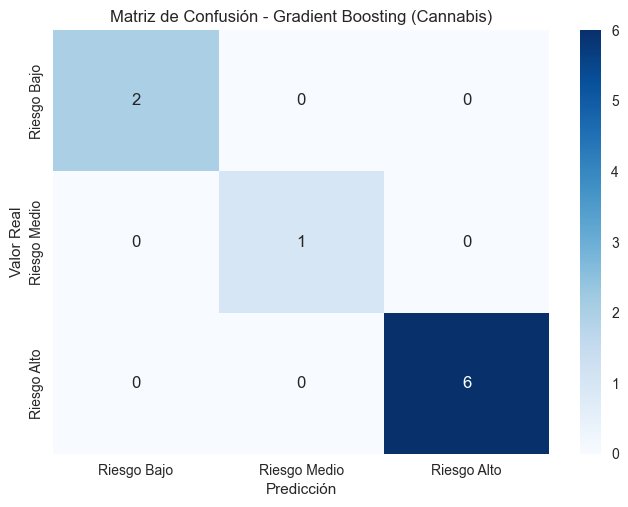

              precision    recall  f1-score   support

 Riesgo Bajo       1.00      1.00      1.00         2
Riesgo Medio       1.00      1.00      1.00         1
 Riesgo Alto       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Precisión del Gradient Boosting con Cannabis
En Prueba: 1.00


In [1259]:
# Generar matriz de confusión a partir de las clases estimadas y las reales
conf_matrix_gb_cannabis = confusion_matrix(y_test_riesgo_cannabis, y_test_pred_gb_riesgo_cannabis)

conf_matrix_mapped_gb_cannabis = pd.DataFrame(
    conf_matrix_gb_cannabis, 
    index=dict_encoder_riesgo_tres_niveles.keys(), 
    columns=dict_encoder_riesgo_tres_niveles.keys())

sns.heatmap(conf_matrix_mapped_gb_cannabis, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Gradient Boosting (Cannabis)')
plt.show()

# Mostrar métricas de evaluación 
print(classification_report(y_test_riesgo_cannabis, y_test_pred_gb_riesgo_cannabis, target_names=dict_encoder_riesgo_tres_niveles.keys()))

accuracy_test_gb_riesgo_cannabis = accuracy_score(y_test_riesgo_cannabis, y_test_pred_gb_riesgo_cannabis)

print('Precisión del Gradient Boosting con Cannabis')
# print(f'En Entrenamiento: {accuracy_train_gb_riesgo_cannabis:.2f}')
print(f'En Prueba: {accuracy_test_gb_riesgo_cannabis:.2f}')



### Gradient Boosting - Psilocibina


In [1260]:
# Definir la variable objetivo
y_test_riesgo_psilocibina = df_test_encoded_psilocibina['Nivel de Riesgo Tratamiento Psilocibina']

# Re organizar las columnas en el mismo orden que el dataset de entrenamiento
df_test_encoded_psilocibina_gb = df_test_encoded_psilocibina.reindex(columns=X_test_riesgo_psilocibina.columns)

In [1261]:
# Hacer prediciones con los datos de prueba
y_test_pred_gb_riesgo_psilocibina = model_psilocibina.predict(df_test_encoded_psilocibina_gb)


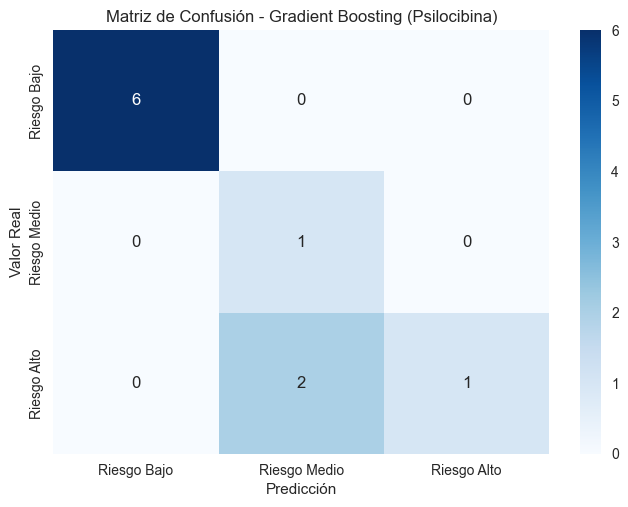

              precision    recall  f1-score   support

 Riesgo Bajo       1.00      1.00      1.00         6
Riesgo Medio       0.33      1.00      0.50         1
 Riesgo Alto       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.78      0.78      0.67        10
weighted avg       0.93      0.80      0.80        10

Precisión del Gradient Boosting con Psilocibina
En Prueba: 0.80


In [1262]:
# Generar matriz de confusión a partir de las clases estimadas y las reales
conf_matrix_gb_psilocibina = confusion_matrix(y_test_riesgo_psilocibina, y_test_pred_gb_riesgo_psilocibina)

conf_matrix_mapped_gb_psilocibina = pd.DataFrame(conf_matrix_gb_psilocibina, 
                                   index=dict_encoder_riesgo_tres_niveles.keys(), 
                                   columns=dict_encoder_riesgo_tres_niveles.keys())

sns.heatmap(conf_matrix_mapped_gb_psilocibina, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Gradient Boosting (Psilocibina)')
plt.show()

# Mostrar métricas de evaluación 
print(classification_report(y_test_riesgo_psilocibina, y_test_pred_gb_riesgo_psilocibina, target_names=dict_encoder_riesgo_tres_niveles.keys()))

accuracy_test_gb_riesgo_psilocibina = accuracy_score(y_test_riesgo_psilocibina, y_test_pred_gb_riesgo_psilocibina)
# accuracy_train_gb_riesgo_psilocibina = accuracy_score(y_train_balanced_riesgo_psilocibina, y_train_pred_gb_riesgo_psilocibina)

print('Precisión del Gradient Boosting con Psilocibina')
# print(f'En Entrenamiento: {accuracy_train_gb_riesgo_psilocibina:.2f}')
print(f'En Prueba: {accuracy_test_gb_riesgo_psilocibina:.2f}')

## Resultados


In [1263]:
df_test_encoded = pd.concat([df_test_encoded_cannabis, df_test_encoded_psilocibina], axis=1)
df_test_encoded = df_test_encoded.sort_index()
df_test_encoded[['Nivel de Riesgo Tratamiento Cannabis', 'Nivel de Riesgo Tratamiento Psilocibina']]

,Nivel de Riesgo Tratamiento Cannabis,Nivel de Riesgo Tratamiento Psilocibina
0,2.0,1
1,3.0,3
2,3.0,1
3,NaN,1
4,3.0,2
5,3.0,3
6,1.0,1
7,1.0,1
8,3.0,1
9,3.0,3


In [1264]:
df_test[['Nivel de Riesgo Tratamiento Cannabis', 'Nivel de Riesgo Tratamiento Psilocibina']]

,Nivel de Riesgo Tratamiento Cannabis,Nivel de Riesgo Tratamiento Psilocibina
0,Riesgo Medio,Riesgo Bajo
1,Riesgo Alto,Riesgo Alto
2,Riesgo Alto,Riesgo Bajo
3,Riesgo Desconocido,Riesgo Bajo
4,Riesgo Alto,Riesgo Medio
5,Riesgo Alto,Riesgo Alto
6,Riesgo Bajo,Riesgo Bajo
7,Riesgo Bajo,Riesgo Bajo
8,Riesgo Alto,Riesgo Bajo
9,Riesgo Alto,Riesgo Alto
